# Introduction

Our customer, the superstore, thinks that there are uncertainties about their sales and this negatively affects their sales and decreases their profits. They want to increase their profits and they are asking us  to find out what they should pay attention to in order to increase their sales. The data set they have provide for me to work with has 20 variables listed below:


Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit


# Importing the libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import itertools
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



# Load The Dataset

In [50]:
df = ('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Final project /Time Series Data_Store/Sample - Superstore.csv')
Df = pd.read_csv(df)
Df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


First I want to explore the dataset and see tyoe of data, number of rows and columns, name of columns in order to decide on what features to include.

In [51]:
#number of rows and columns
Df.shape

(9994, 21)

In [52]:
# Column names 
Df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [53]:
#Check data type
Df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Now I want to see if there are any missing values in my dataset.

In [54]:
Df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

There is no missing values in the dataset. This is good. Now i want to see the time frame of my dataset. 

Now I want to check columns

In [55]:
Df['Row ID'].value_counts()

2047    1
7473    1
3387    1
1338    1
7481    1
       ..
2716    1
8857    1
4759    1
6806    1
2049    1
Name: Row ID, Length: 9994, dtype: int64

Since, Row ID is just a serial number so I will drop it.

In [56]:
#Dropping Row ID column
Df=Df.drop('Row ID',axis=1)
Df.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [57]:
Df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

As we can see the data is for United States only. We can drop the 'Country' column as we dont need any analysis to be done based on it.

In [58]:
#Dropping Country column
Df=Df.drop('Country',axis=1)
Df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 1.Category

I want to see the different product categories.

In [59]:
Df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

So, we have 'Furniture', 'Office Supplies', 'Technology'.

In [60]:
#Count the number of products in each category 
Df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

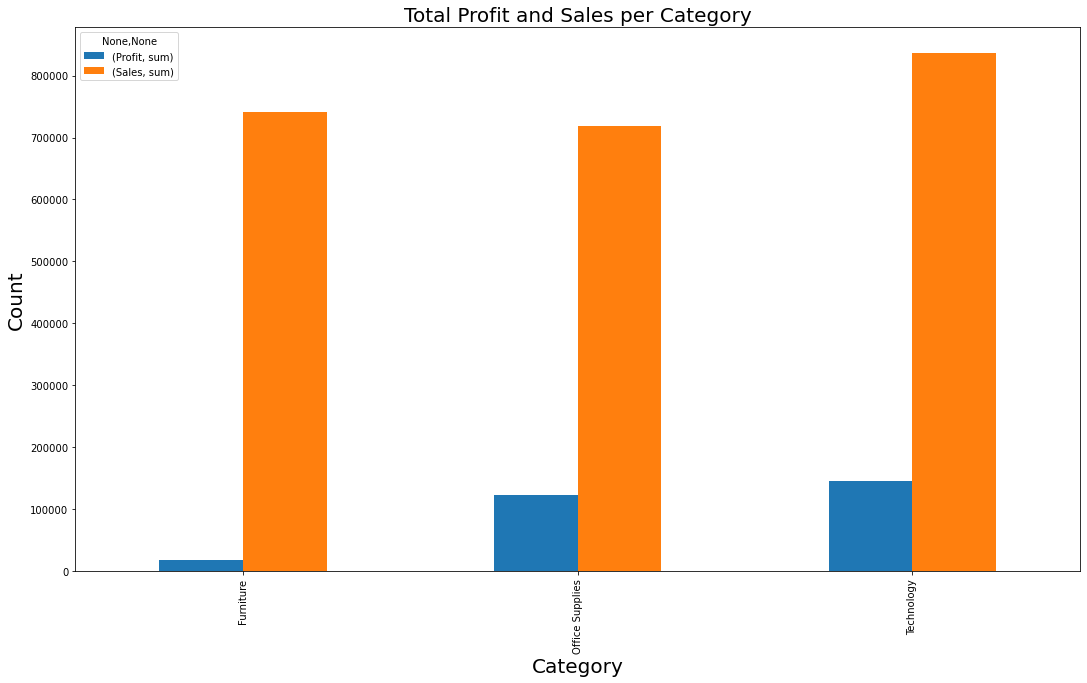

In [61]:
#Total Profit and sales per category
Df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize= (18,10))
plt.ylabel('Count', size = 20)
plt.xlabel('Category', size = 20)
plt.title('Total Profit and Sales per Category', size = 20)
plt.show()

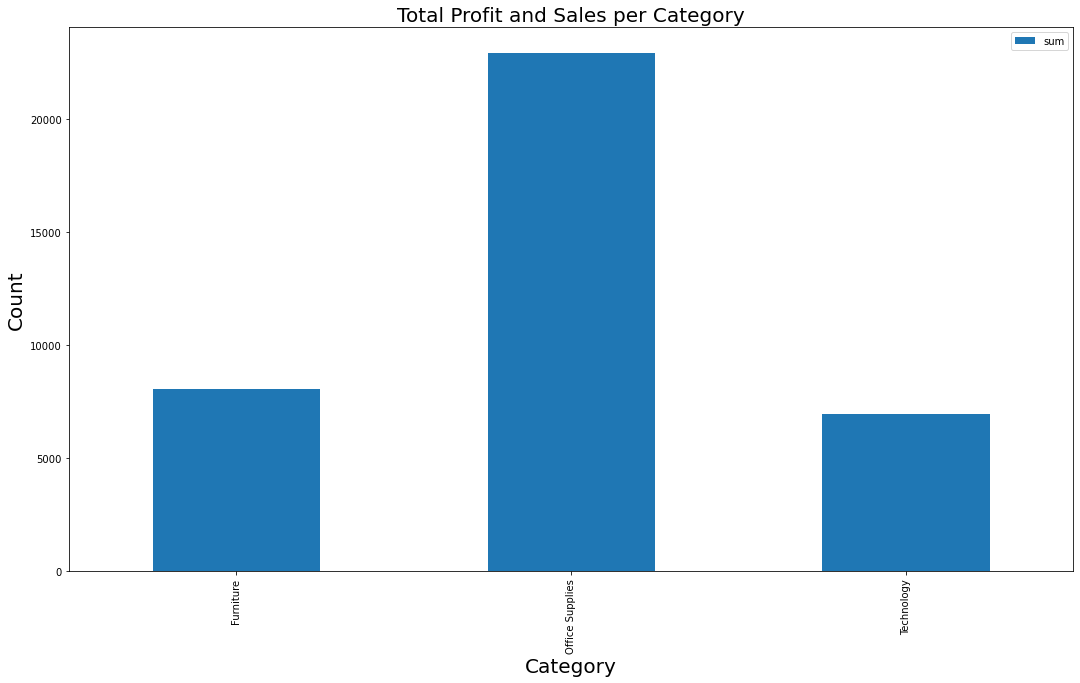

In [62]:
#Total Quantity per category
Df.groupby('Category')['Quantity'].agg(['sum']).plot.bar(figsize= (18,10))
plt.ylabel('Count', size = 20)
plt.xlabel('Category', size = 20)
plt.title('Total Profit and Sales per Category', size = 20)
plt.show()

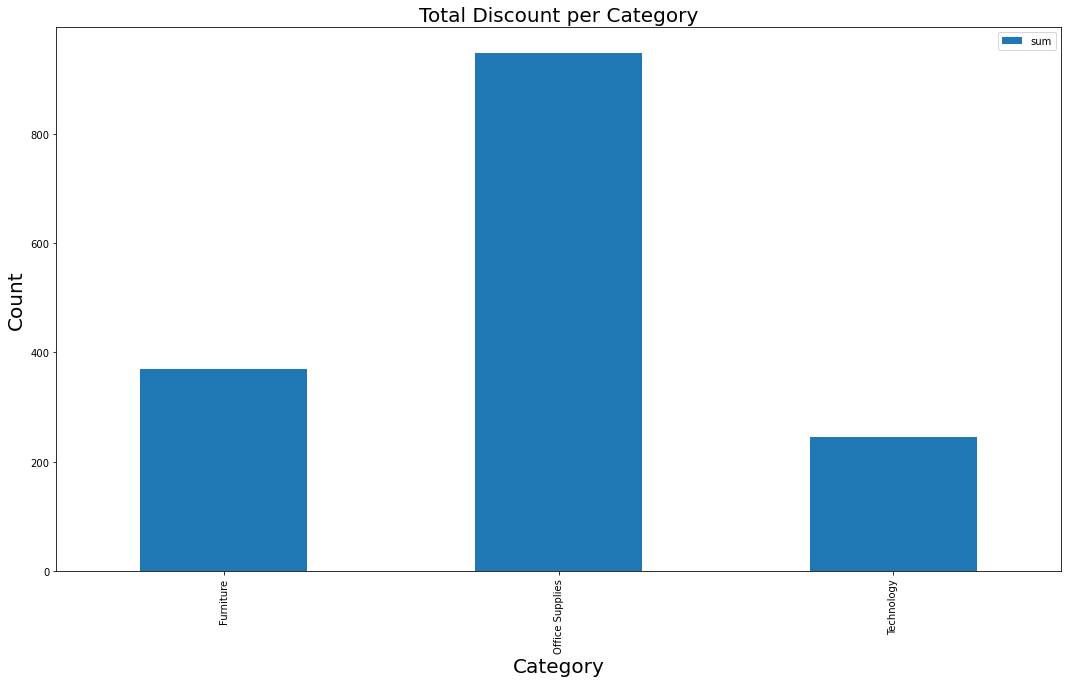

In [63]:
#Total Discount per category
Df.groupby('Category')['Discount'].agg(['sum']).plot.bar(figsize= (18,10))
plt.ylabel('Count', size = 20)
plt.xlabel('Category', size = 20)
plt.title('Total Discount per Category', size = 20)
plt.show()

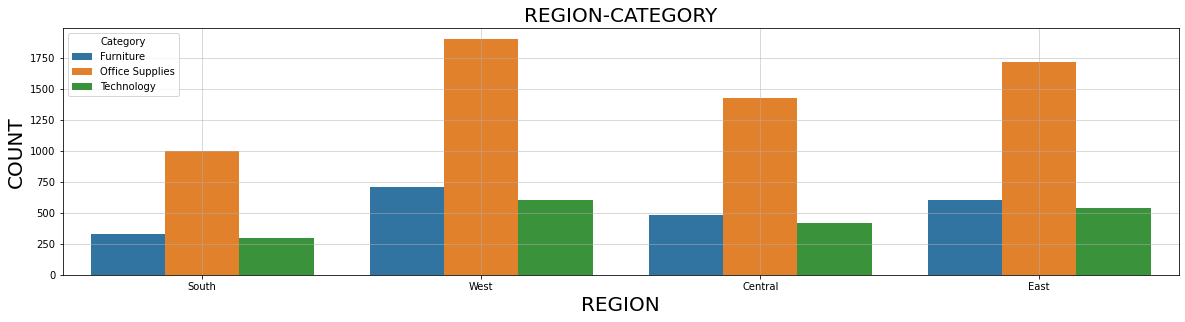

In [64]:
#Ploting based upon the REGION and the category based.
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot('Region',hue='Category',data=Df)
plt.title('REGION-CATEGORY', size=20)
plt.ylabel('COUNT', size=20)
plt.xlabel('REGION',size=20)
plt.grid(alpha=0.6)
plt.show()



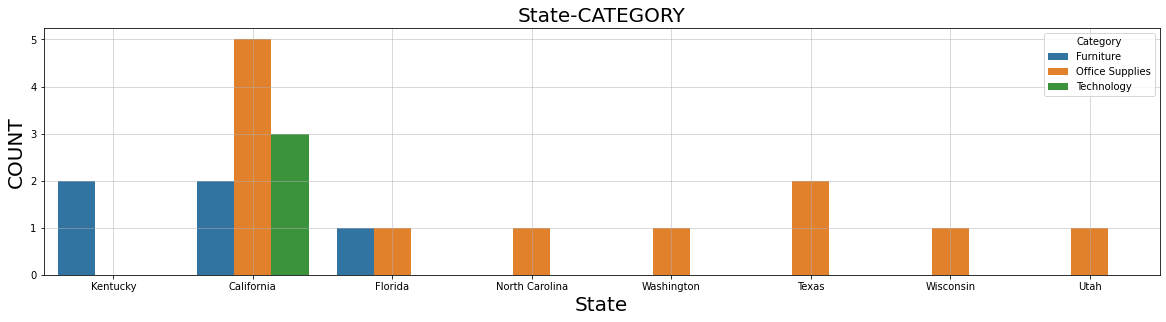

In [65]:
#Ploting based upon the State and the category based.
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot('State',hue='Category',data=Df.head(20))
plt.title('State-CATEGORY', size=20)
plt.ylabel('COUNT', size=20)
plt.xlabel('State',size=20)
plt.grid(alpha=0.6)
plt.show()

# 2.Sub-Category

In [66]:
#Check on Sub-categories products are divided.
Df['Sub-Category'].unique()


array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [67]:
#Check on number of Sub-categories products are divided.
Df['Sub-Category'].nunique()

17

In [68]:
#Check on number of products in each sub-category
Df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

Now, I want to see how Sub-Categories distributed by percentage

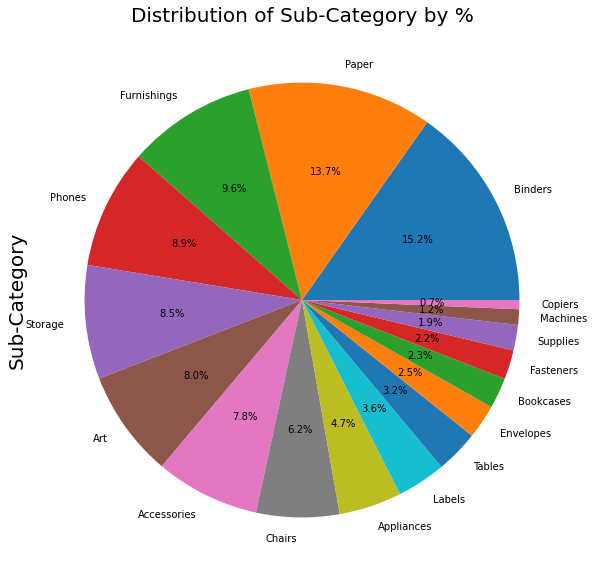

In [69]:
plt.figure(figsize=(12,10))
Df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel('Sub-Category', size = 20)
plt.title('Distribution of Sub-Category by %', size = 20)
plt.show()

As we can see from the pie chart above, there is wide variety of Office Supplies especially in Binders and Paper department.

Lets look at the how sales and profit differs between Sub-Categories.

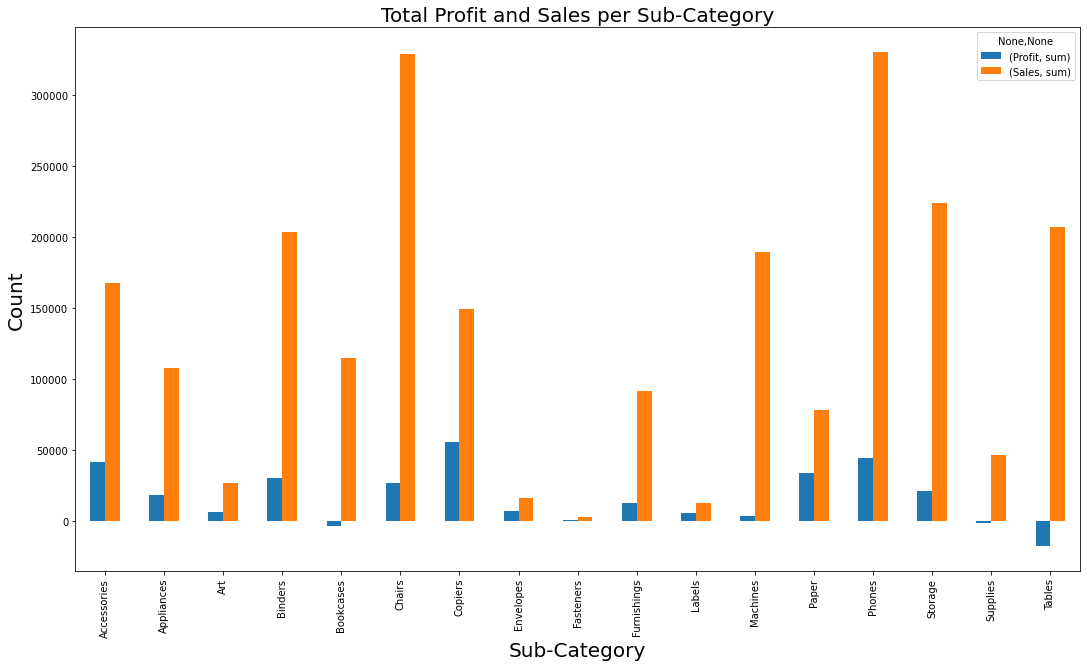

In [70]:
#Total Profit and sales per Sub-Category
Df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize= (18,10))
plt.ylabel('Count', size = 20)
plt.xlabel('Sub-Category', size = 20)
plt.title('Total Profit and Sales per Sub-Category', size = 20)
plt.show()

As we can see from the chart above highest profit is coming from Copiers followed by Accessories and phones.  Phones and Chairs are having the Highest selling price. Bookcases, tables and supplies are having loss!


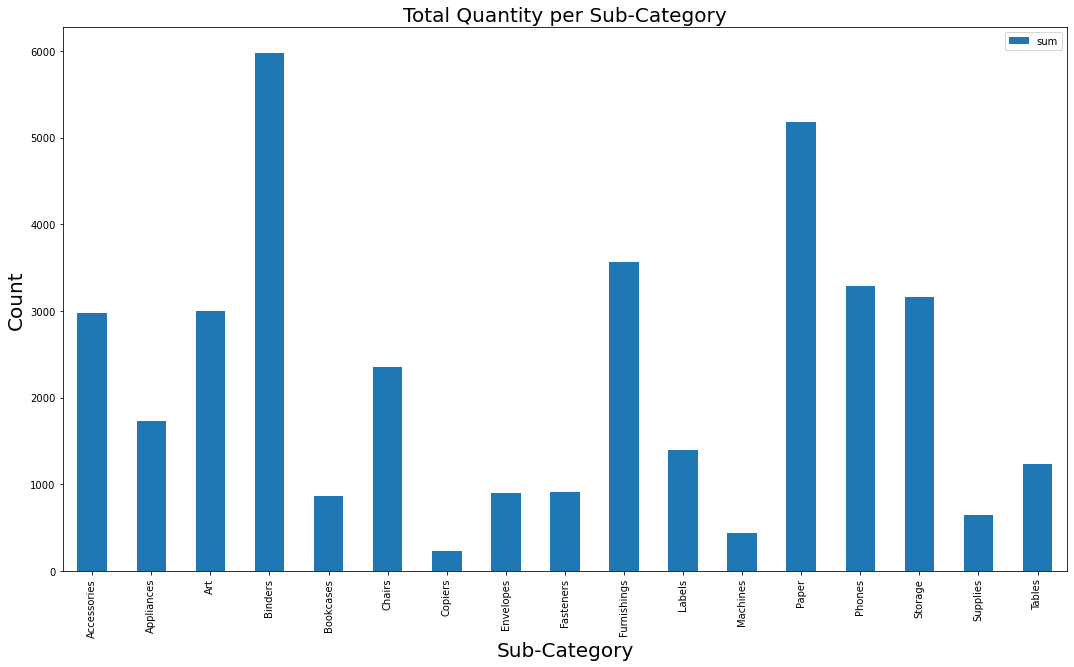

In [71]:
#Total Quantity per Sub-Category
Df.groupby('Sub-Category')['Quantity'].agg(['sum']).plot.bar(figsize= (18,10))
plt.ylabel('Count', size = 20)
plt.xlabel('Sub-Category', size = 20)
plt.title('Total Quantity per Sub-Category', size = 20)
plt.show()

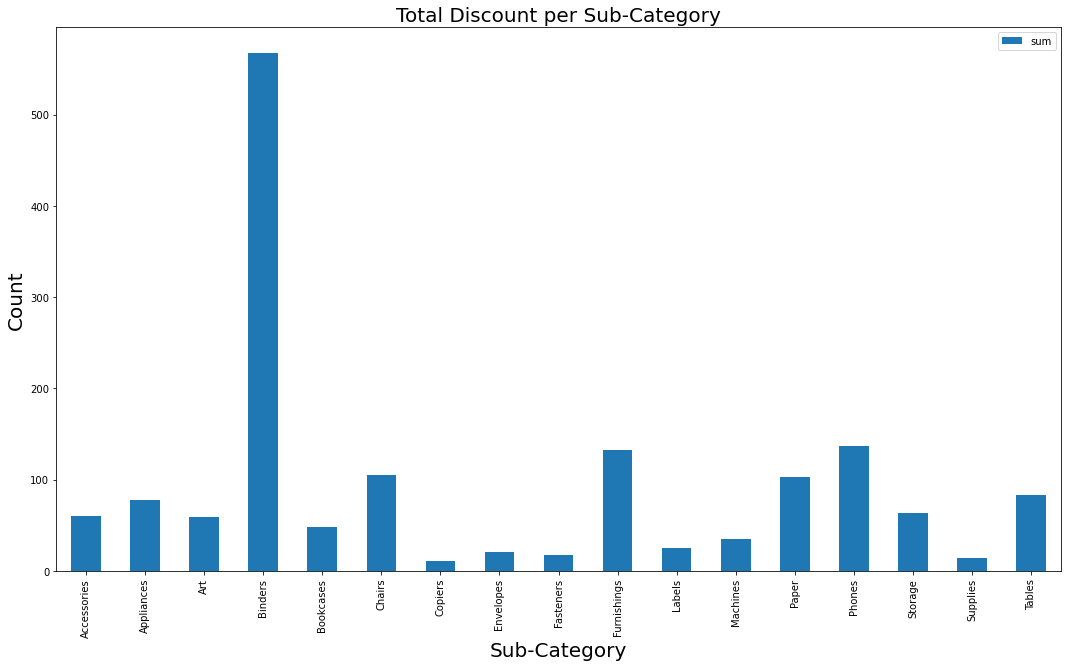

In [72]:
#Total Discount per Sub-Category
Df.groupby('Sub-Category')['Discount'].agg(['sum']).plot.bar(figsize= (18,10))
plt.ylabel('Count', size = 20)
plt.xlabel('Sub-Category', size = 20)
plt.title('Total Discount per Sub-Category', size = 20)
plt.show()

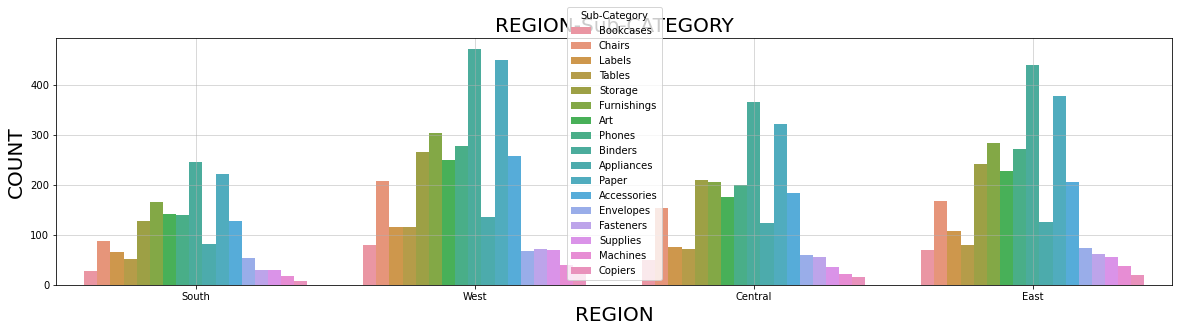

In [73]:
#Ploting based upon the REGION and the category based.
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot('Region',hue='Sub-Category',data=Df)
plt.title('REGION-Sub-CATEGORY', size=20)
plt.ylabel('COUNT', size=20)
plt.xlabel('REGION',size=20)
plt.grid(alpha=0.6)
plt.show()

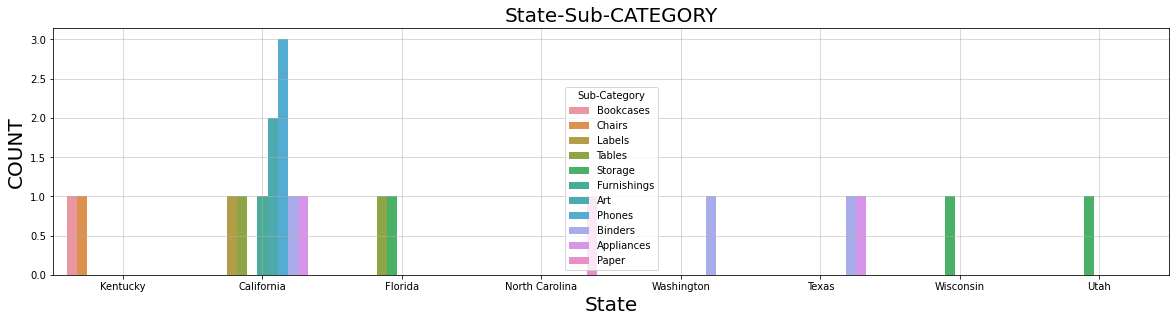

In [74]:
#Ploting based upon the REGION and the category based.
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot('State',hue='Sub-Category',data=Df.head(20))
plt.title('State-Sub-CATEGORY', size=20)
plt.ylabel('COUNT', size=20)
plt.xlabel('State',size=20)
plt.grid(alpha=0.6)
plt.show()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


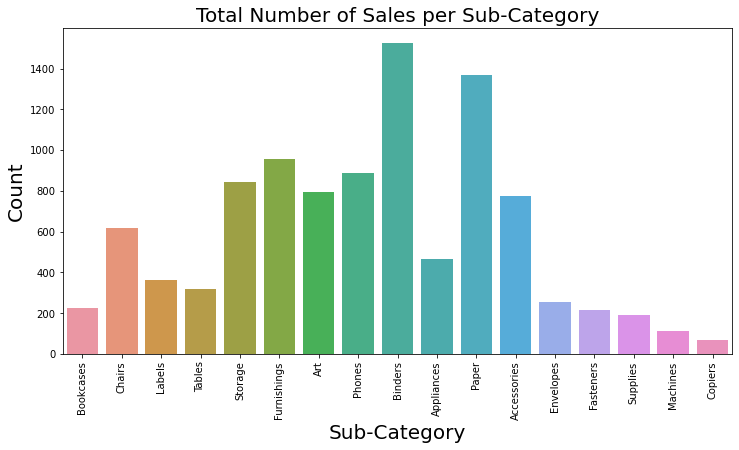

In [75]:
#Ploting based upon the Sub-Category.
print(Df['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=Df['Sub-Category'])
plt.ylabel('Count', size = 20)
plt.xlabel('Sub-Category', size = 20)
plt.title('Total Number of Sales per Sub-Category', size = 20)
plt.xticks(rotation=90)
plt.show()

# 2.Product 

I want to do product based anaylisis to see which product is selling more.

In [76]:
#Check on number of products available in store in total
Df['Product Name'].nunique()

1850

In [77]:
Df['Product Name'].value_counts()

Staple envelope                                  48
Easy-staple paper                                46
Staples                                          46
Avery Non-Stick Binders                          20
Staples in misc. colors                          19
                                                 ..
Panasonic KX MB2061 Multifunction Printer         1
Ultra Commercial Grade Dual Valve Door Closer     1
Acco Glide Clips                                  1
I.R.I.S IRISCard Anywhere 5 Card Scanner          1
Sony 8GB Class 10 Micro SDHC R40 Memory Card      1
Name: Product Name, Length: 1850, dtype: int64

Since I am not able to see all the products and the number of the products clearly from the value_counts, I want to see the top 10 products.

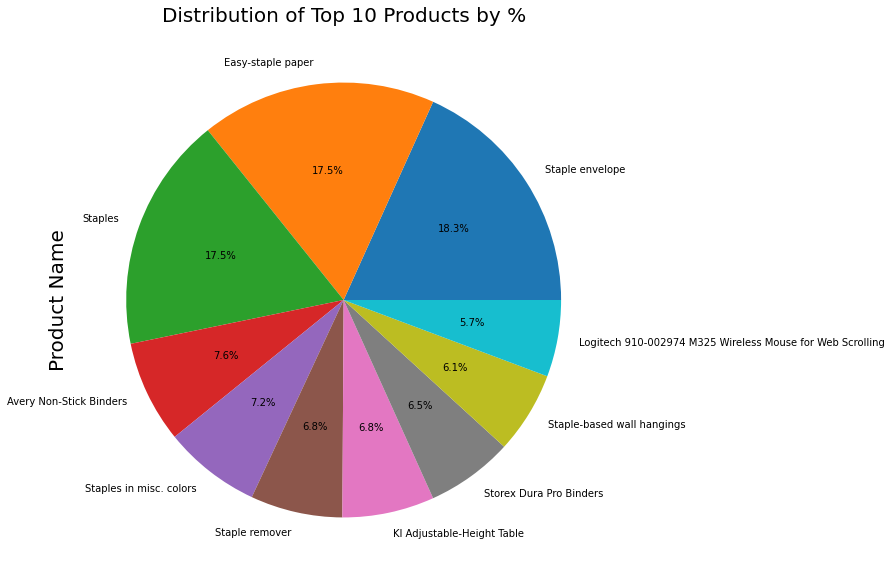

In [78]:
plt.figure(figsize=(12,10))
Df['Product Name'].value_counts().head(10).plot.pie(autopct="%1.1f%%")
plt.ylabel('Product Name', size = 20)
plt.title('Distribution of Top 10 Products by %', size = 20)
plt.show()

# 3.Customer

First of all i want to see how many customers do i have. 

In [79]:
Df['Customer ID'].nunique()

793

Now I want to see the top 10 buying customers and where do they order from.

In [80]:
#Top 10 customers who order frequently
Df_top10=Df['Customer Name'].value_counts().head(10)
Df_top10

William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Jonathan Doherty       32
Chloris Kastensmidt    32
Seth Vernon            32
Edward Hooks           32
Zuschuss Carroll       31
Emily Phan             31
Name: Customer Name, dtype: int64

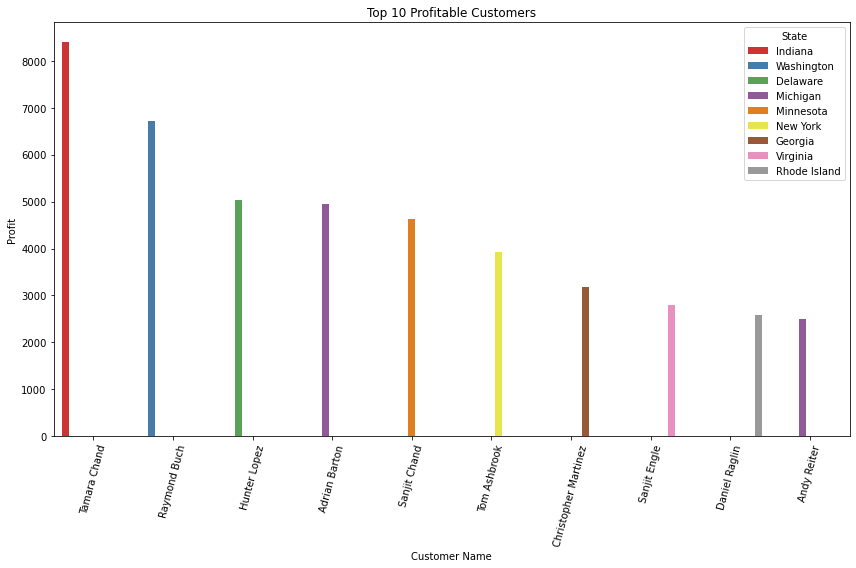

In [81]:
#Top 10 Customers by the profit
Top10_customer = Df.sort_values(['Profit'], ascending=False).head(10)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Customer Name', y='Profit',hue='State',palette='Set1', data=Top10_customer, ax=ax)
ax.set_title("Top 10 Profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

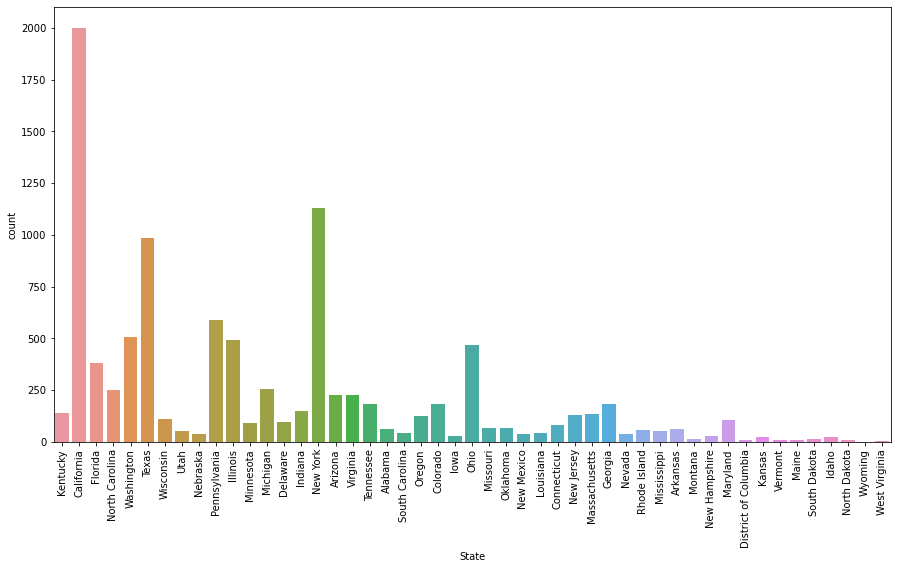

In [82]:
#Ploting based upon the State. 
print(Df['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=Df['State'])
plt.xticks(rotation=90)
plt.show()

As we can see the higer number of buyers are from New York and California states.

In [83]:
# top selling products by state 
Df.columns


Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [84]:
sale_Products_state = Df.groupby(["Product Name","State"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(10)
sale_Products_state


,Product Name,State,Quantity
6592,Staple envelope,New York,44
6659,Staples,Texas,39
2542,Eldon Shelf Savers Cubes and Bins,California,29
112,4009 Highlighters by Sanford,California,27
7228,Wilson Jones Clip & Carry Folder Binder Tool f...,California,26
2319,"Dual Level, Single-Width Filing Carts",New York,26
6599,Staple holder,California,25
2902,"File Shuttle II and Handi-File, Black",California,25
7598,Xerox 1919,California,25
4392,"Lesro Sheffield Collection Coffee Table, End T...",California,25


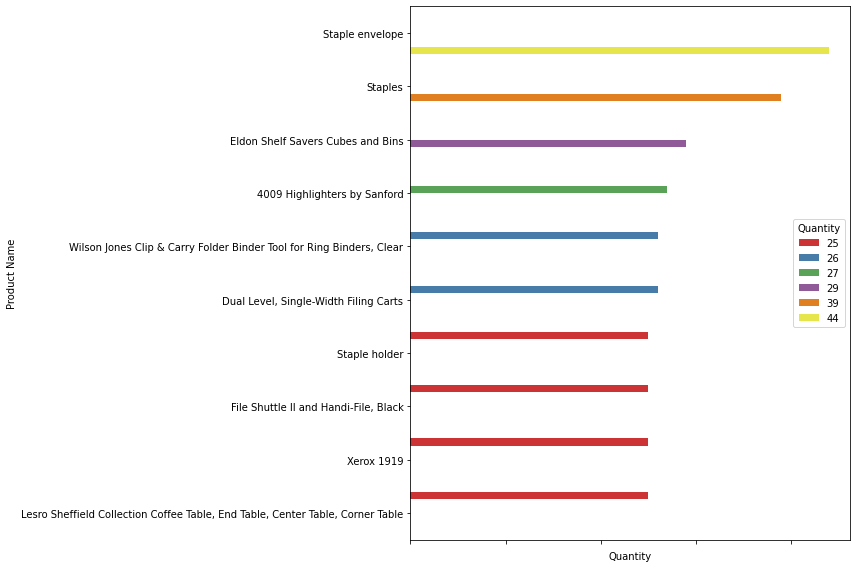

In [85]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Quantity', y='Product Name',hue='Quantity',palette='Set1', data=sale_Products_state, ax=ax)
#ax.set_title("Top 10 Profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

In [86]:
sale_Products_Sub_Category = Df.groupby(["Sub-Category","State"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(10)
sale_Products_Sub_Category

,Sub-Category,State,Quantity
452,Paper,California,1091
130,Binders,California,1057
344,Furnishings,California,751
157,Binders,New York,696
498,Phones,California,691
87,Art,California,644
542,Storage,California,637
168,Binders,Texas,626
488,Paper,Texas,572
3,Accessories,California,568


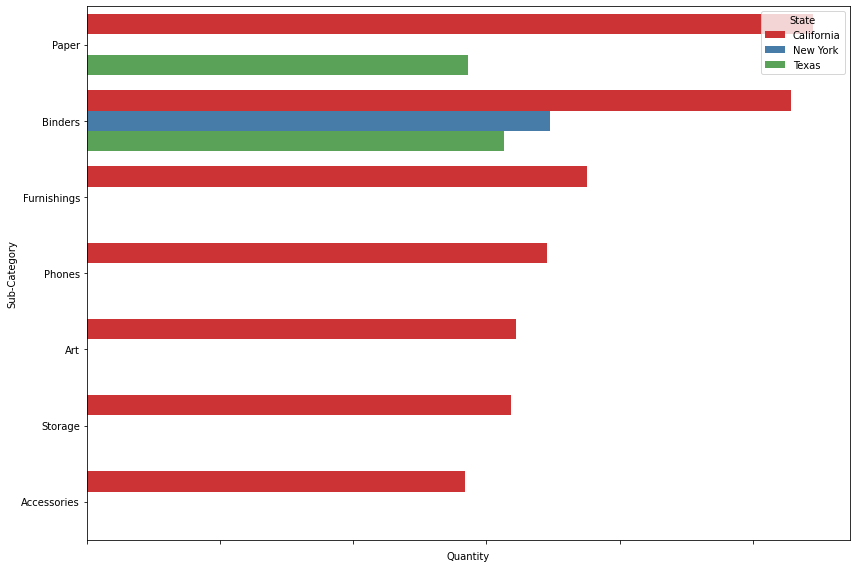

In [87]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Quantity', y='Sub-Category',hue='State',palette='Set1', data=sale_Products_Sub_Category, ax=ax)
#ax.set_title("Top 10 Profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

# 5. Profit-Cost

In [151]:
Df['Cost'] = Df['Sales']-Df['Profit']
Df['Cost']

0        220.0464
1        512.3580
2          7.7486
3       1340.6085
4         19.8516
          ...    
9989      21.1452
9990      76.3268
9991     239.1828
9992      16.2800
9993     170.2120
Name: Cost, Length: 9994, dtype: float64

In [177]:
Df['Profit%'] = (Df['Profit']/Df['Cost'])*100
Df['Profit%']

0       19.047619
1       42.857143
2       88.679245
3      -28.571429
4       12.676056
          ...    
9989    19.402985
9990    20.481928
9991     8.108108
9992    81.818182
9993    42.857143
Name: Profit%, Length: 9994, dtype: float64

In [178]:
profit=pd.DataFrame(Df.groupby(["Region","Category"]).agg({"Cost":"sum","Sales":"sum","Profit":"sum"}).reset_index())
profit['prc_profit']=(profit['Profit']/profit['Sales'])*100
profit=profit.sort_values(['Region'])[["Region","Category","Profit",'prc_profit']]
profit


,Region,Category,Profit,prc_profit
0,Central,Furniture,-2871.0494,-1.752808
1,Central,Office Supplies,8879.9799,5.316512
2,Central,Technology,33697.4320,19.773595
3,East,Furniture,3046.1658,1.462455
4,East,Office Supplies,41014.5791,19.956873
5,East,Technology,47462.0351,17.911961
6,South,Furniture,6771.2061,5.772619
7,South,Office Supplies,19986.3928,15.906235
8,South,Technology,19991.8314,13.437908
9,West,Furniture,11504.9503,4.554382


In [179]:
Df.groupby(["Category"]).agg({"Cost":"sum","Sales":"sum","Profit":"sum"}).reset_index()

,Category,Cost,Sales,Profit
0,Furniture,723548.5225,741999.7953,18451.2728
1,Office Supplies,596556.2312,719047.0320,122490.8008
2,Technology,690699.0849,836154.0330,145454.9481


In [206]:
profit=Df.groupby(["Category"]).agg({"Sales":"sum","Profit":"sum", "Quantity":"sum", "Discount":"sum"}).reset_index()
profit['prc_profit']=(profit['Profit']/profit['Sales'])*100
profit=profit.sort_values(["Profit"])[["Category","Profit",'prc_profit',"Quantity", 'Discount']]
profit

,Category,Profit,prc_profit,Quantity,Discount
0,Furniture,18451.2728,2.486695,8028,368.89
1,Office Supplies,122490.8008,17.035158,22906,947.80
2,Technology,145454.9481,17.395712,6939,244.40


In [181]:
profit=Df.groupby(["Region","Category"]).agg({"Cost":"sum","Sales":"sum","Profit":"sum","Quantity":"sum","Discount":"sum"}).reset_index()
profit['prc_profit']=(profit['Profit']/profit['Quantity'])*100
profit=profit.sort_values(['Region'])[["Region","Category","Profit",'prc_profit', 'Discount']]
profit[profit["Category"]=="Furniture"]

,Region,Category,Profit,prc_profit,Discount
0,Central,Furniture,-2871.0494,-157.145561,143.04
3,East,Furniture,3046.1658,137.586531,92.60
6,South,Furniture,6771.2061,524.493114,40.35
9,West,Furniture,11504.9503,426.741480,92.90


In [182]:
profit=Df.groupby(["Region","Category"]).agg({"Cost":"sum","Sales":"sum","Profit":"sum","Quantity":"sum","Discount":"sum"}).reset_index()
profit['prc_profit']=(profit['Profit']/profit['Quantity'])*100
profit=profit.sort_values(['Region'])[["Region","Category","Profit",'prc_profit','Discount']]
profit[profit["Category"]=="Office Supplies"]

,Region,Category,Profit,prc_profit,Discount
1,Central,Office Supplies,8879.9799,164.170455,359.4
4,East,Office Supplies,41014.5791,634.704102,244.7
7,South,Office Supplies,19986.3928,525.957705,166.6
10,West,Office Supplies,52609.8490,727.157554,177.1


In [183]:
profit=Df.groupby(["Region","Category"]).agg({"Cost":"sum","Sales":"sum","Profit":"sum","Quantity":"sum", "Discount":"sum"}).reset_index()
profit['prc_profit']=(profit['Profit']/profit['Quantity'])*100
profit=profit.sort_values(['Region'])[["Region","Category","Profit",'prc_profit','Discount']]
profit[profit["Category"]=="Technology"]

,Region,Category,Profit,prc_profit,Discount
2,Central,Technology,33697.4320,2182.476166,55.9
5,East,Technology,47462.0351,2443.977091,76.7
8,South,Technology,19991.8314,1788.178122,31.6
11,West,Technology,44303.6496,1897.372574,80.2


In [184]:
#Products with high Profit Percentage 
Df_high =Df.sort_values(['Profit%','Sub-Category'],ascending=False).groupby('Profit%')
Df_high.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Prep_time,Cost,Profit%
1696,CA-2015-156335,2015-09-25,2015-09-28,Second Class,PO-19195,Phillina Ober,Home Office,Bayonne,New Jersey,7002,...,netTALK DUO VoIP Telephone Service,104.980,2,0.0,52.4900,2015,2015-09-01,3 days,52.4900,100.000000
2592,CA-2017-128300,2017-11-24,2017-11-26,Second Class,RS-19765,Roland Schwarz,Corporate,Summerville,South Carolina,29483,...,Motorla HX550 Universal Bluetooth Headset,79.100,2,0.0,39.5500,2017,2017-11-01,2 days,39.5500,100.000000
6338,CA-2017-143112,2017-10-05,2017-10-09,Standard Class,TS-21370,Todd Sumrall,Corporate,New York City,New York,10035,...,Samsung HM1900 Bluetooth Headset,87.800,4,0.0,43.9000,2017,2017-10-01,4 days,43.9000,100.000000
246,CA-2014-131926,2014-06-01,2014-06-06,Second Class,DW-13480,Dianna Wilson,Home Office,Lakeville,Minnesota,55044,...,Adams Telephone Message Book w/Frequently-Call...,47.880,6,0.0,23.9400,2014,2014-06-01,5 days,23.9400,100.000000
381,CA-2016-134775,2016-10-28,2016-10-29,First Class,AS-10285,Alejandro Savely,Corporate,San Francisco,California,94109,...,Southworth Structures Collection,50.960,7,0.0,25.4800,2016,2016-10-01,1 days,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,US-2016-144057,2016-05-09,2016-05-13,Standard Class,CV-12805,Cynthia Voltz,Corporate,Austin,Texas,78745,...,Euro Pro Shark Stick Mini Vacuum,48.784,4,0.8,-131.7168,2016,2016-05-01,4 days,180.5008,-72.972973
8766,CA-2015-107083,2015-11-21,2015-11-27,Standard Class,BB-11545,Brenda Bowman,Corporate,Fort Worth,Texas,76106,...,Kensington 6 Outlet SmartSocket Surge Protector,24.588,3,0.8,-67.6170,2015,2015-11-01,6 days,92.2050,-73.333333
9164,CA-2015-164007,2015-06-08,2015-06-12,Standard Class,MG-17695,Maureen Gnade,Consumer,Chicago,Illinois,60610,...,Hoover Shoulder Vac Commercial Portable Vacuum,143.128,2,0.8,-393.6020,2015,2015-06-01,4 days,536.7300,-73.333333
261,US-2017-155299,2017-06-08,2017-06-12,Standard Class,Dl-13600,Dorris liebe,Corporate,Pasadena,Texas,77506,...,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624,2,0.8,-4.4660,2017,2017-06-01,4 days,6.0900,-73.333333


In [186]:
#Products with high Profit Percentage 
Df.sort_values(['Profit%','Sub-Category'],ascending=False).groupby('Profit%').head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Prep_time,Cost,Profit%
1696,CA-2015-156335,2015-09-25,2015-09-28,Second Class,PO-19195,Phillina Ober,Home Office,Bayonne,New Jersey,7002,...,netTALK DUO VoIP Telephone Service,104.980,2,0.0,52.4900,2015,2015-09-01,3 days,52.4900,100.000000
2592,CA-2017-128300,2017-11-24,2017-11-26,Second Class,RS-19765,Roland Schwarz,Corporate,Summerville,South Carolina,29483,...,Motorla HX550 Universal Bluetooth Headset,79.100,2,0.0,39.5500,2017,2017-11-01,2 days,39.5500,100.000000
6338,CA-2017-143112,2017-10-05,2017-10-09,Standard Class,TS-21370,Todd Sumrall,Corporate,New York City,New York,10035,...,Samsung HM1900 Bluetooth Headset,87.800,4,0.0,43.9000,2017,2017-10-01,4 days,43.9000,100.000000
246,CA-2014-131926,2014-06-01,2014-06-06,Second Class,DW-13480,Dianna Wilson,Home Office,Lakeville,Minnesota,55044,...,Adams Telephone Message Book w/Frequently-Call...,47.880,6,0.0,23.9400,2014,2014-06-01,5 days,23.9400,100.000000
381,CA-2016-134775,2016-10-28,2016-10-29,First Class,AS-10285,Alejandro Savely,Corporate,San Francisco,California,94109,...,Southworth Structures Collection,50.960,7,0.0,25.4800,2016,2016-10-01,1 days,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,US-2016-144057,2016-05-09,2016-05-13,Standard Class,CV-12805,Cynthia Voltz,Corporate,Austin,Texas,78745,...,Euro Pro Shark Stick Mini Vacuum,48.784,4,0.8,-131.7168,2016,2016-05-01,4 days,180.5008,-72.972973
8766,CA-2015-107083,2015-11-21,2015-11-27,Standard Class,BB-11545,Brenda Bowman,Corporate,Fort Worth,Texas,76106,...,Kensington 6 Outlet SmartSocket Surge Protector,24.588,3,0.8,-67.6170,2015,2015-11-01,6 days,92.2050,-73.333333
9164,CA-2015-164007,2015-06-08,2015-06-12,Standard Class,MG-17695,Maureen Gnade,Consumer,Chicago,Illinois,60610,...,Hoover Shoulder Vac Commercial Portable Vacuum,143.128,2,0.8,-393.6020,2015,2015-06-01,4 days,536.7300,-73.333333
261,US-2017-155299,2017-06-08,2017-06-12,Standard Class,Dl-13600,Dorris liebe,Corporate,Pasadena,Texas,77506,...,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624,2,0.8,-4.4660,2017,2017-06-01,4 days,6.0900,-73.333333


# 6.Prep Time

I want to see the impact of the prep time on number of sales, profit and selling price with respect to category, sub_category, state and region to see if the delivery tine is correlated with the profit.

In [ ]:
Df.head()

In [93]:
Df["Order Date"] = pd.to_datetime(Df["Order Date"])
Df["Ship Date"] = pd.to_datetime(Df["Ship Date"])
Df['Year'] = Df["Order Date"].dt.year
Df['Month'] = Df['Order Date'].values.astype('datetime64[M]')
Df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,2016-11-01
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,2016-11-01
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,2016-06-01
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,2015-10-01
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,2015-10-01


In [94]:
Df['Prep_time'] = (Df['Ship Date']-Df['Order Date'])
Df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Prep_time
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,2016-11-01,3 days
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,2016-11-01,3 days
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,2016-06-01,4 days
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,2015-10-01,7 days
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,2015-10-01,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,2014-01-01,2 days
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,2017-02-01,5 days
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017,2017-02-01,5 days
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017,2017-02-01,5 days


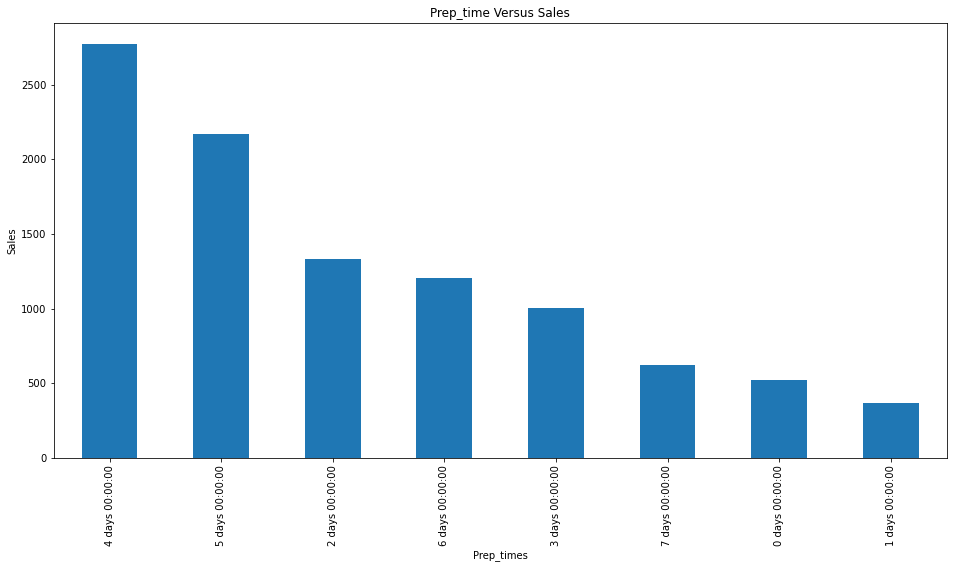

In [169]:
# SPrep_time wise sales

plt.figure(figsize=(16,8))
Df['Prep_time'].value_counts().plot.bar()
plt.title('Prep_time Versus Sales')
plt.ylabel('Sales')
plt.xlabel('Prep_times')
plt.show()

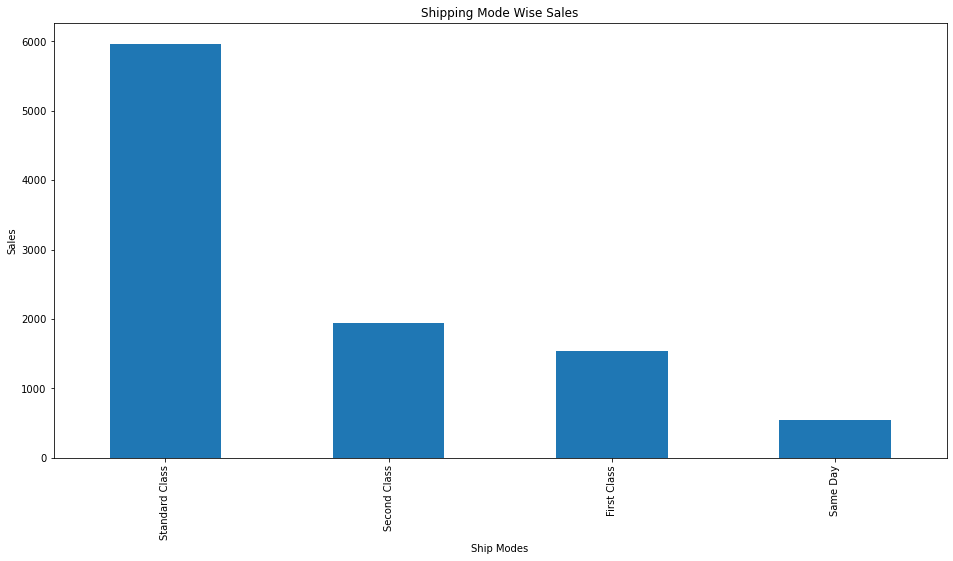

In [95]:
# Shipping Mode wise sales

plt.figure(figsize=(16,8))
Df['Ship Mode'].value_counts().plot.bar()
plt.title('Shipping Mode Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Ship Modes')
plt.show()

As we can see from the chart above the Standard Class shipping method is the highest which is 12 times higher than same day. 
If they decrease the price of the other shipping method that could increase the customer satisfaction. 


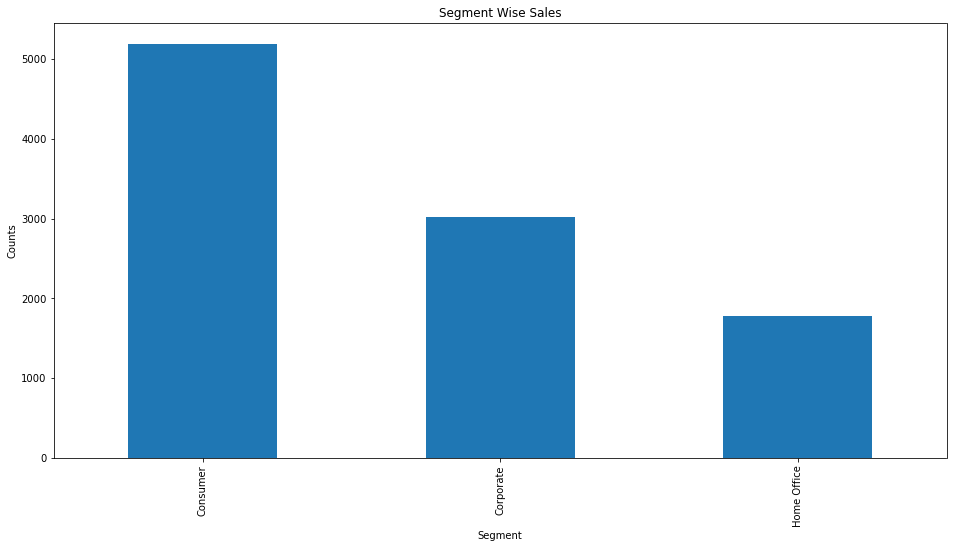

In [96]:
# Shipping Mode wise sales


Df['Segment'].value_counts().plot.bar(figsize=(16,8))
plt.title('Segment Wise Sales')
plt.ylabel('Counts')
plt.xlabel('Segment')
plt.show()

The distribution is highest in Consumer Segment.

In [97]:
Df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Year', 'Month', 'Prep_time'],
      dtype='object')

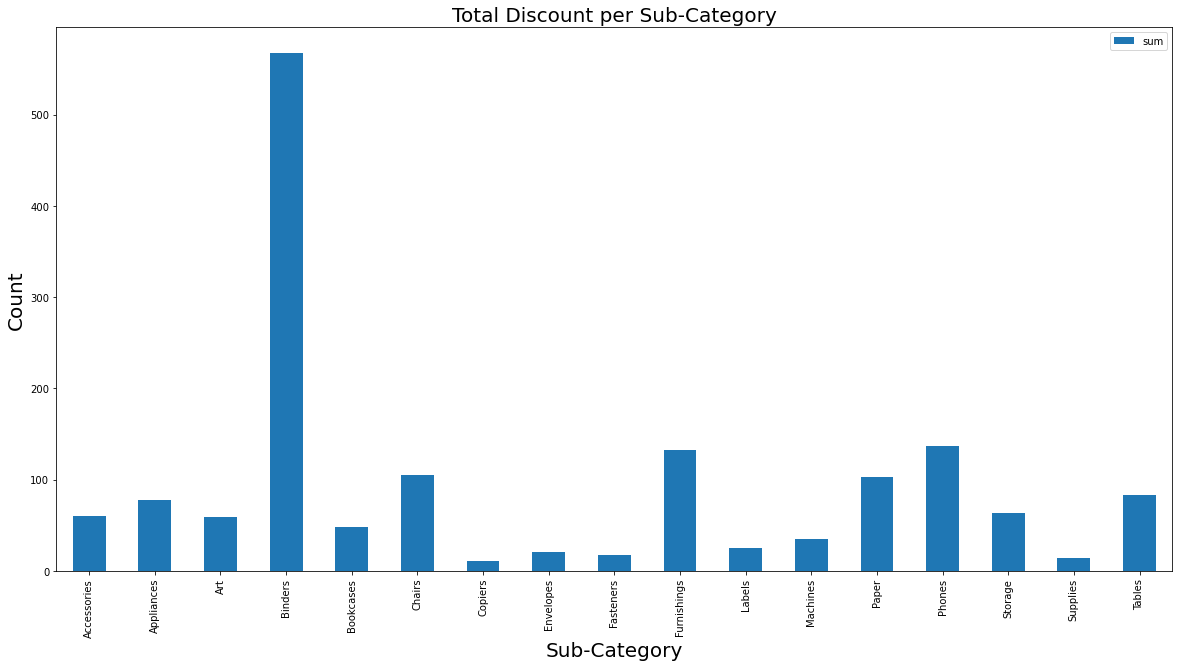

In [98]:

Df.groupby('Sub-Category')['Discount'].agg(['sum']).plot.bar(figsize= (20,10))
plt.ylabel('Count', size = 20)
plt.xlabel('Sub-Category', size = 20)
plt.title('Total Discount per Sub-Category', size = 20)
plt.show()

Binders having the highest discount followed by Phones and Furnishing. 

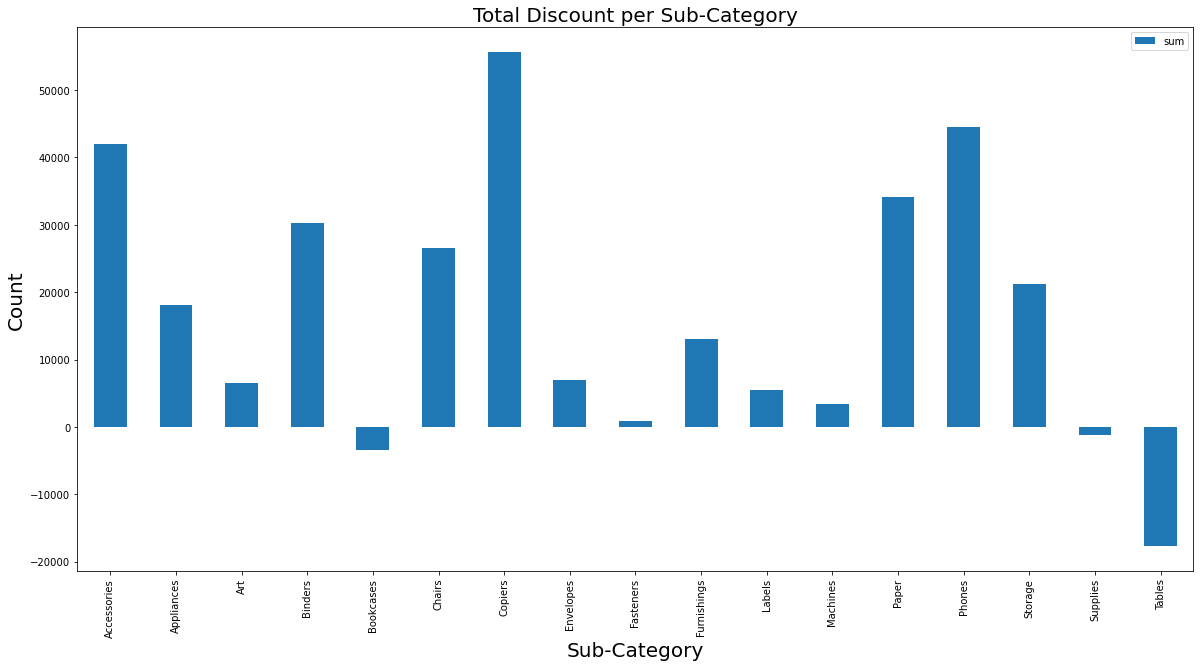

In [99]:
Df.groupby('Sub-Category')['Profit'].agg(['sum']).plot.bar(figsize= (20,10), )
plt.ylabel('Count', size = 20)
plt.xlabel('Sub-Category', size = 20)
plt.title('Total Discount per Sub-Category', size = 20)
plt.show()

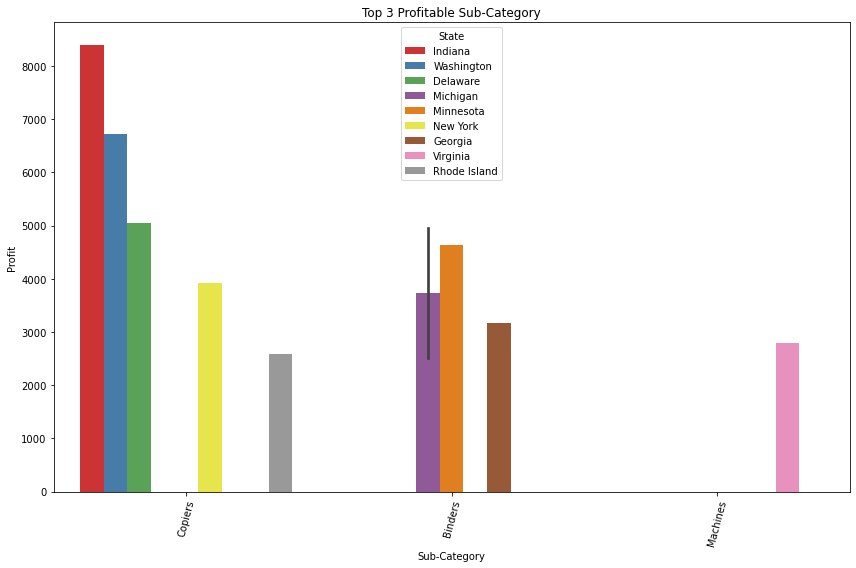

In [100]:
Top3_profit = Df.sort_values(['Profit'], ascending=False).head(10)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Sub-Category', y='Profit',hue='State',palette='Set1', data=Top10_customer, ax=ax)
ax.set_title("Top 3 Profitable Sub-Category")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

In [187]:
#extracting the year of order
Df['order year']=Df['Order Date'].dt.year
Df['order year'].head()

0    2016
1    2016
2    2016
3    2015
4    2015
Name: order year, dtype: int64

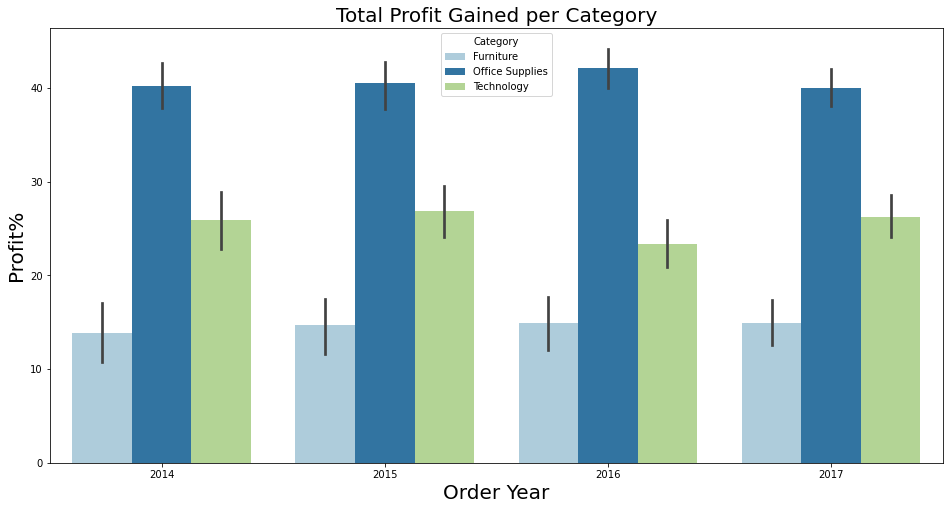

In [198]:
#Calculating Profit gained in each Category per year
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot('order year','Profit%',hue='Category',palette='Paired',data=Df)
plt.title('Total Profit Gained per Category', size = 20)
plt.ylabel('Profit%', size = 20)
plt.xlabel('Order Year', size = 20)

plt.show()

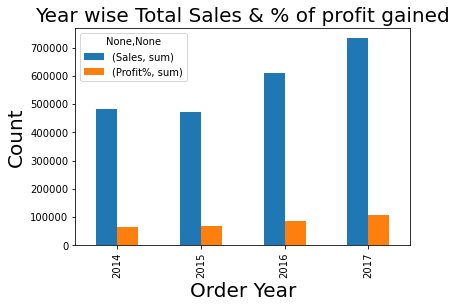

In [197]:
#Sales per year
Df.groupby('order year')['Sales','Profit%'].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales & % of profit gained', size = 20)
plt.ylabel('Count', size = 20)
plt.xlabel('Order Year', size = 20)
plt.show()

In [204]:
profit_by_year=Df.groupby(["Year"]).agg({"Sales":"sum","Cost":"sum","Profit":"sum"}).reset_index()
profit_by_year["prc_profit"]=(profit_by_year["Profit"]/profit_by_year["Sales"])*100

In [205]:
profit_by_year

,Year,Sales,Cost,Profit,prc_profit
0,2014,484247.4981,434703.5240,49543.9741,10.231126
1,2015,470532.5090,408913.9053,61618.6037,13.095504
2,2016,609205.5980,527410.4237,81795.1743,13.426530
3,2017,733215.2552,639775.9856,93439.2696,12.743771



As a result of all our analysis, we see that the increase/decrease in profit rate is not related to sales. On the basis of years, although the sales amounts and numbers increased, the rate of profit did not increase in the same way. Even though the sales rates continued to increase in 2017, the profit rate decreased. Despite the increase in sales, the reasons for the decrease in the rate of profit may be the reduction given, advertising to the wrong regions, giving weight to the products in the wrong category, or increasing the cost.